In [117]:
import numpy as np 
import pandas as pd 
import csv 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay

Step 1: Preprocessing the data 

In [67]:
df = pd.read_csv('data.csv')
df.shape

(569, 33)

In [68]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Replacing elements in the diagnosis column 

Benign (B) = 0;
Malignant (M) = 1

In [71]:
# Replace 'M' with 1 and 'B' with 0 in the diagnosis column
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


C:\Users\shrin\AppData\Local\Temp\ipykernel_15496\1714376855.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


In [72]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [73]:
# Displaying all the column names 
print("Names of all the columns")
for idx, col in enumerate(df.columns):
    print(f'{idx}. {col}')

Names of all the columns
0. id
1. diagnosis
2. radius_mean
3. texture_mean
4. perimeter_mean
5. area_mean
6. smoothness_mean
7. compactness_mean
8. concavity_mean
9. concave points_mean
10. symmetry_mean
11. fractal_dimension_mean
12. radius_se
13. texture_se
14. perimeter_se
15. area_se
16. smoothness_se
17. compactness_se
18. concavity_se
19. concave points_se
20. symmetry_se
21. fractal_dimension_se
22. radius_worst
23. texture_worst
24. perimeter_worst
25. area_worst
26. smoothness_worst
27. compactness_worst
28. concavity_worst
29. concave points_worst
30. symmetry_worst
31. fractal_dimension_worst
32. Unnamed: 32


In [74]:
# Create a list of columns to drop
columns_to_drop = []

# Check for columns to drop
if 'id' in df.columns:
    columns_to_drop.append('id')
    
if 'Unnamed: 32' in df.columns:
    columns_to_drop.append('Unnamed: 32')
    
# Drop columns if any were found
if columns_to_drop:
    df = df.drop(columns_to_drop, axis=1)
    print(f"\nDropped these columns: {columns_to_drop}")
else:
    print("\nNo columns were dropped")
    

df.head()


Dropped these columns: ['id', 'Unnamed: 32']


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
scaler = StandardScaler()

X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

print("Original features before scaling")
display(X.head())

print("Original features after scaling")
display(X_scaled_df.head())

X_scaled_df.describe()

Original features before scaling


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Original features after scaling


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Step 2 : Exploratory Data Analysis (EDA)

# Exploratory Data Analysis (EDA)

We'll analyze the following aspects of our data:

1. **Class Distribution**: Check if our dataset is balanced between benign and malignant cases
2. **Correlation Analysis**: Identify which features are highly correlated with each other
3. **Outlier Detection**: Look for any unusual values in our features using box plots
4. **Feature Distributions**: Examine how features are distributed across different diagnoses

This will help us:
- Identify if we need to handle class imbalance
- Select the most important features
- Detect potential data quality issues
- Understand the relationships between features

In [76]:
features_mean = [col for col in df.columns if '_mean' in col]

# Get statistical summary of all mean features
print("Statistical summary of mean features:")
print(df[features_mean].describe().round(2))

print("\nMean Features in the dataset:")
for idx, col in enumerate(features_mean, 1):
    print(f"{idx}. {col}")


# If you want to see value counts for each mean feature separately:
print("\nValue counts for each mean feature:")
for feature in features_mean:
    print("\nfeature")
    
    print(pd.cut(df[feature], bins = 5).value_counts().sort_index().round(3))


Statistical summary of mean features:
       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05           0.18   
std 

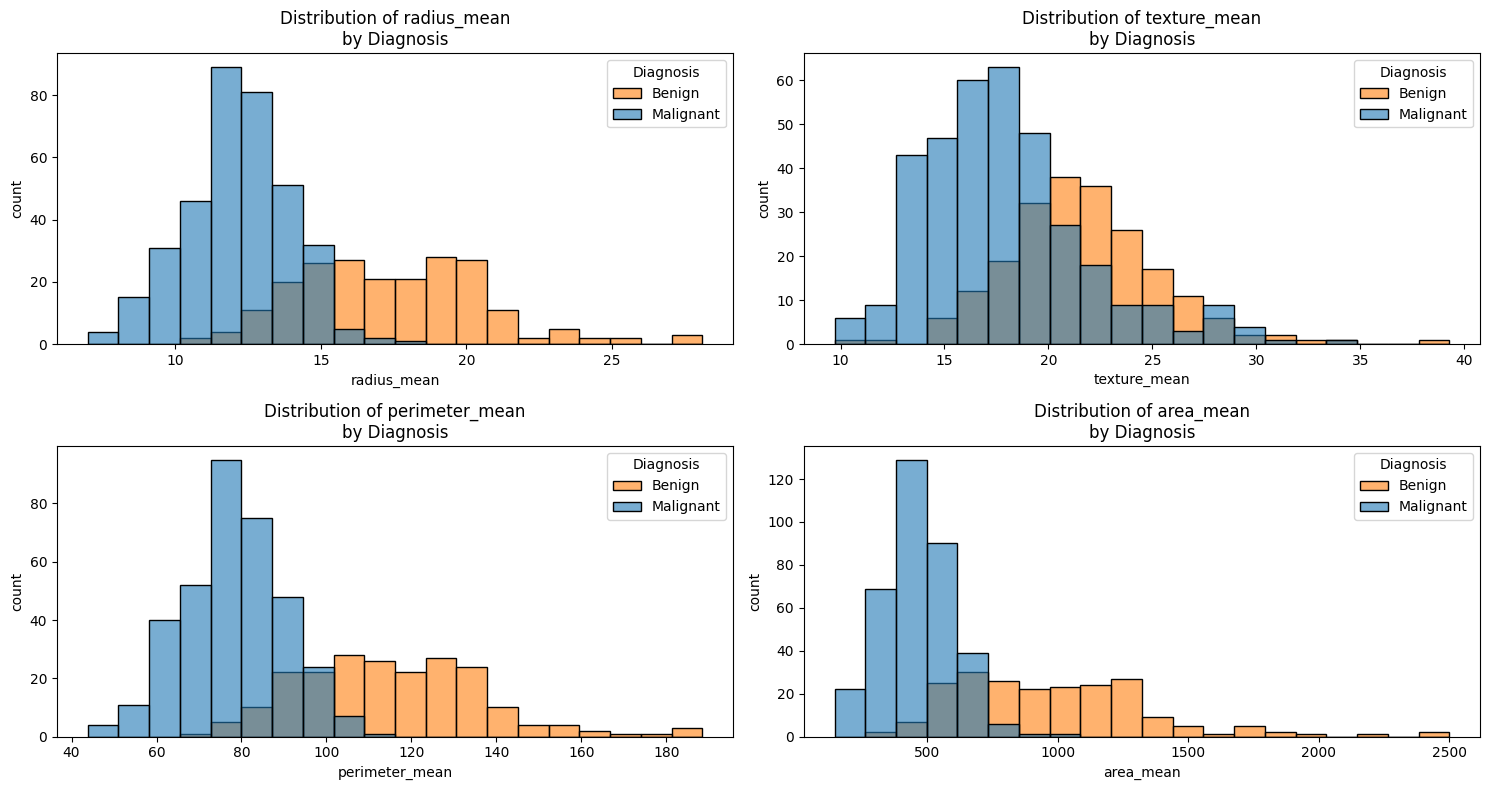

In [77]:
plt.figure(figsize = (15, 8))
demo_features = features_mean[:4]

for idx, feature in enumerate(demo_features, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data = df, x = feature, hue = 'diagnosis', bins = 20, alpha = 0.6)
    plt.title(f'Distribution of {feature}\nby Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('count') 
    plt.legend(title = 'Diagnosis', labels = ['Benign', 'Malignant'])

plt.tight_layout()
plt.show()

C:\Users\shrin\AppData\Local\Temp\ipykernel_15496\4212475064.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_proportions = df.groupby(binned_data)['diagnosis'].mean() * 100


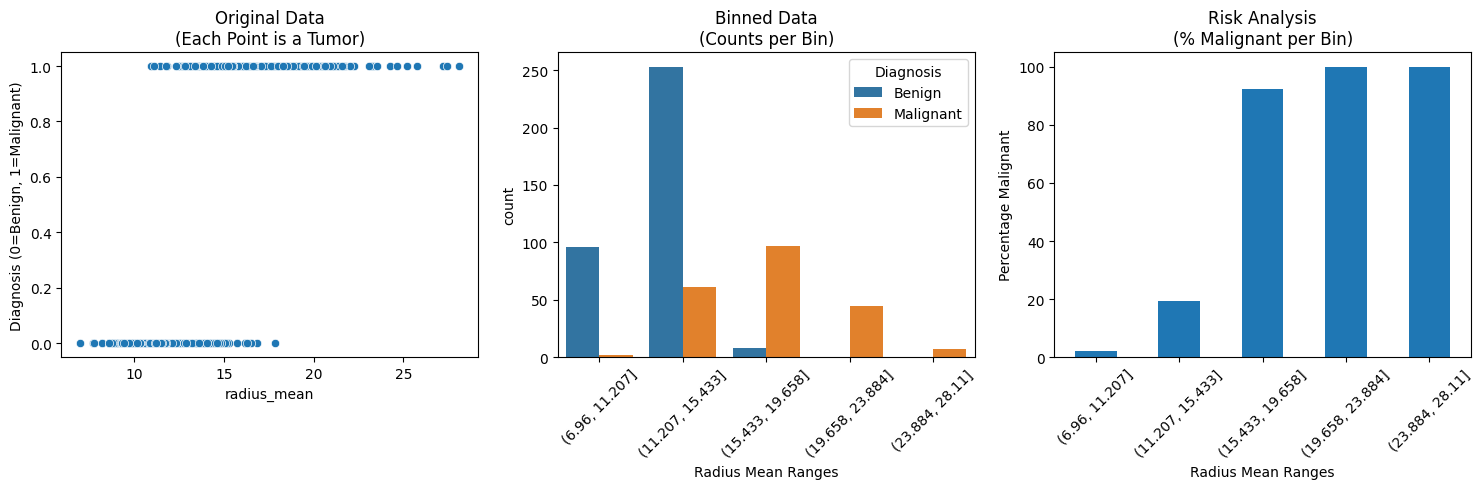


Risk Analysis for each radius_mean range:
(6.96, 11.207]: 2.0% malignant
(11.207, 15.433]: 19.4% malignant
(15.433, 19.658]: 92.4% malignant
(19.658, 23.884]: 100.0% malignant
(23.884, 28.11]: 100.0% malignant


In [78]:
feature = 'radius_mean'

plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x=feature, y='diagnosis')
plt.title('Original Data\n(Each Point is a Tumor)')
plt.ylabel('Diagnosis (0=Benign, 1=Malignant)')

# Binned data
plt.subplot(1, 3, 2)
binned_data = pd.cut(df[feature], bins=5)
sns.countplot(x=binned_data, hue=df['diagnosis'])
plt.title('Binned Data\n(Counts per Bin)')
plt.xticks(rotation=45)
plt.xlabel('Radius Mean Ranges')
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])

# Risk analysis
plt.subplot(1, 3, 3)
bin_proportions = df.groupby(binned_data)['diagnosis'].mean() * 100
bin_proportions.plot(kind='bar')
plt.title('Risk Analysis\n(% Malignant per Bin)')
plt.ylabel('Percentage Malignant')
plt.xlabel('Radius Mean Ranges')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print risk analysis
print("\nRisk Analysis for each radius_mean range:")
for bin_range, percentage in bin_proportions.items():
    print(f"{bin_range}: {percentage:.1f}% malignant")

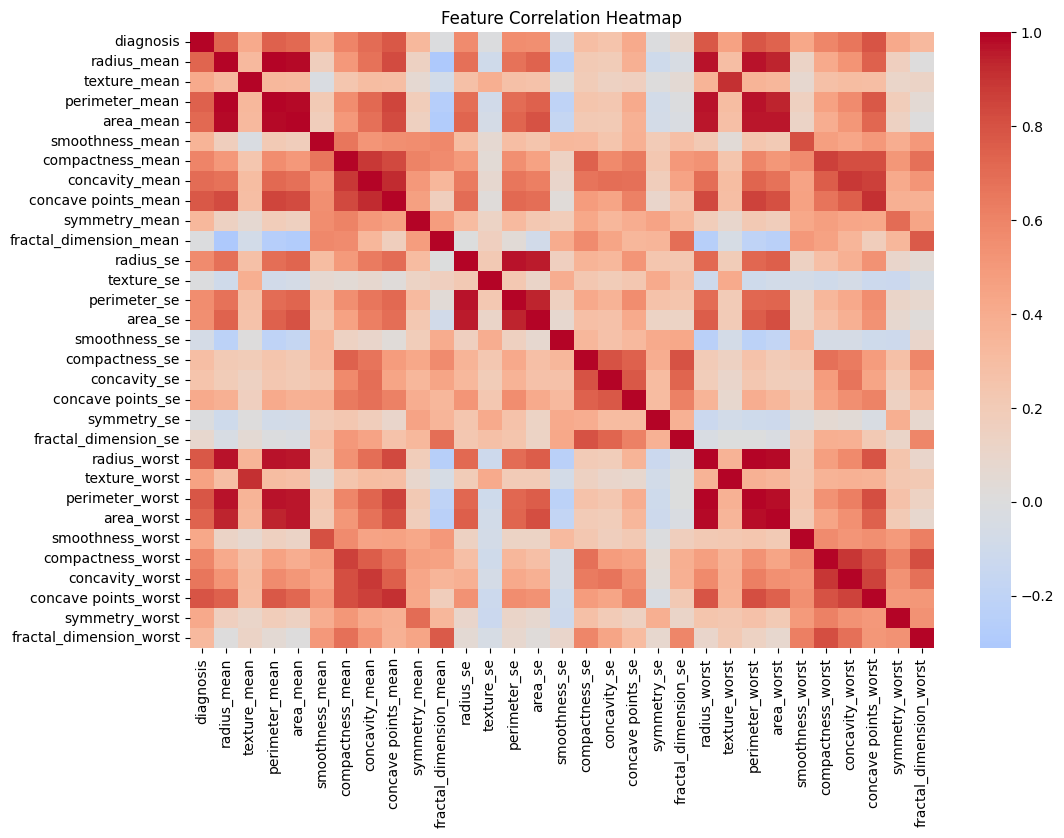

In [79]:
# Checking correlations 
plt.figure(figsize = (12, 8))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', center = 0)
plt.title('Feature Correlation Heatmap')
plt.show()

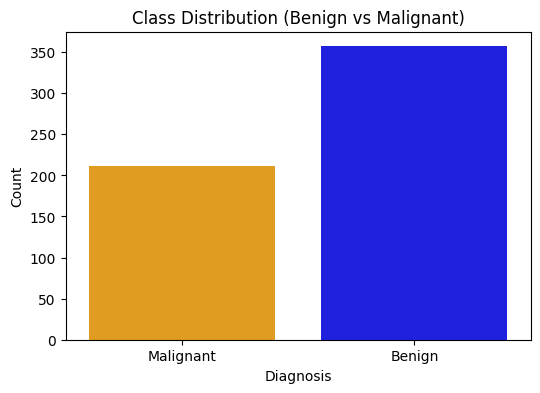

diagnosis_label
Benign       0.627417
Malignant    0.372583
Name: proportion, dtype: float64


In [80]:
# Ensure clean labels
df['diagnosis_label'] = df['diagnosis'].map({0: 'Benign', 1: 'Malignant'})

plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x='diagnosis_label',
    hue='diagnosis_label',                      # <- required so palette is respected
    hue_order=['Benign', 'Malignant'],          # <- fixes order
    palette={'Benign': 'blue', 'Malignant': 'orange'},
    dodge=False,                                # 1 bar per category
    legend=False
)
plt.title('Class Distribution (Benign vs Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

print(df['diagnosis_label'].value_counts(normalize=True))

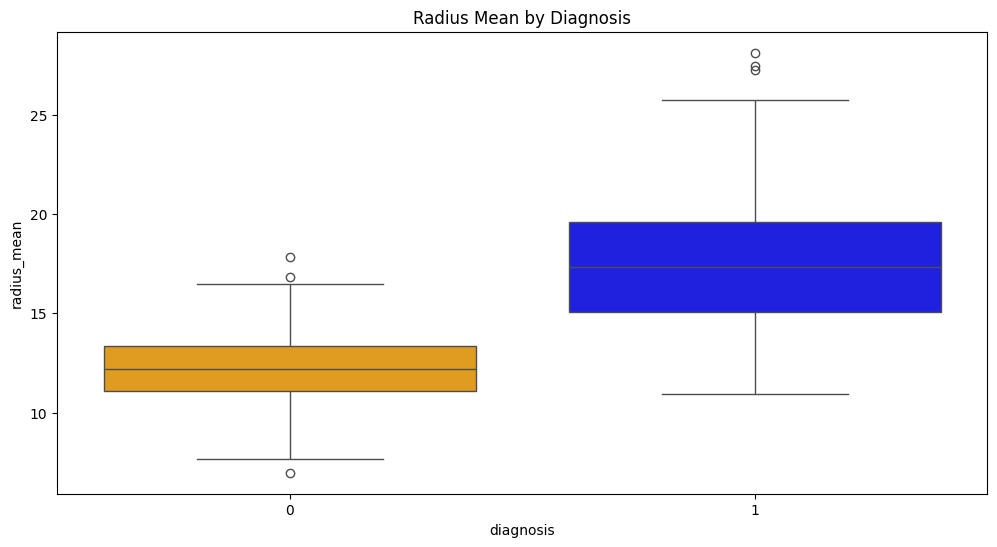

In [81]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = df, hue = 'diagnosis', palette = {0 : 'orange', 1 : 'blue'}, legend = False)
plt.title('Radius Mean by Diagnosis')
plt.show()

Step 3 : Feature Selection/Engineering

In [82]:
# 1) numeric-only frame
df_num = df.select_dtypes(include=[np.number])

# 2) correlation matrix
corr = df_num.corr(numeric_only=True)

# 3) keep upper triangle to avoid duplicates
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# 4) list highly correlated pairs (|r| > 0.90)
high_pairs = (
    upper.abs()                           # use absolute correlation
         .stack()                         # Series indexed by (row, col)
         .rename_axis(['feature_1','feature_2'])
         .reset_index(name='corr')        # <- name is a string
         .query('corr > 0.90')
         .sort_values('corr', ascending=False)
)
print(high_pairs)


               feature_1             feature_2      corr
31           radius_mean        perimeter_mean  0.997855
421         radius_worst       perimeter_worst  0.993708
32           radius_mean             area_mean  0.987357
87        perimeter_mean             area_mean  0.986507
422         radius_worst            area_worst  0.984015
437      perimeter_worst            area_worst  0.977578
276            radius_se          perimeter_se  0.972794
106       perimeter_mean       perimeter_worst  0.970387
49           radius_mean          radius_worst  0.969539
104       perimeter_mean          radius_worst  0.969476
51           radius_mean       perimeter_worst  0.965137
130            area_mean          radius_worst  0.962746
133            area_mean            area_worst  0.959213
132            area_mean       perimeter_worst  0.959120
277            radius_se               area_se  0.951830
107       perimeter_mean            area_worst  0.941550
52           radius_mean       

In [83]:
to_drop = set(high_pairs['feature_2'])
df_reduced = df_num.drop(columns = list(to_drop))
print(f"Dropping {len(to_drop)} columns: ", sorted(to_drop))
print("Remaining: ", df_reduced.columns.tolist())

Dropping 10 columns:  ['area_mean', 'area_se', 'area_worst', 'concave points_mean', 'concave points_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst', 'radius_worst', 'texture_worst']
Remaining:  ['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [84]:
X = df.select_dtypes(include = [np.number]).drop(['diagnosis'], axis = 1)
y = df['diagnosis']

selector = SelectKBest(score_func = f_classif, k = 10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top 10 features : ", selected_features)

Top 10 features :  Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


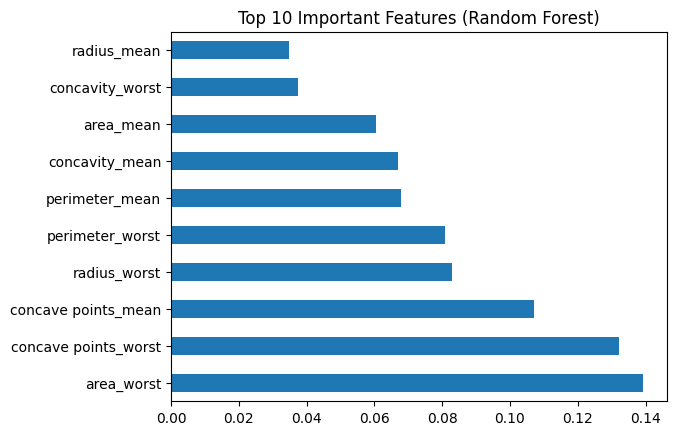

In [85]:
# Importing the RandomForestClassifier 

model = RandomForestClassifier(random_state = 42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index = X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

In [86]:
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X)
print("Explained variance by 10 components: ", sum(pca.explained_variance_ratio_))

Explained variance by 10 components:  0.9999998946838415


In [95]:
X = df_num.drop(columns = ['diagnosis'])
y = df_num['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

X_scaled_train = scaler.fit_transform(X_train) 
X_scaled_test = scaler.transform(X_test) 

X_train_scaled = pd.DataFrame(X_scaled_train, columns = X.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_scaled_test, columns = X.columns, index = X_test.index)

print("Train set size: ", X_scaled_train.shape[0])
print("Test set size: ", X_scaled_test.shape[0])

print("\nClass distribution in train set:", y_train.value_counts(normalize = True))
print("\nClass distribution in test set:", y_test.value_counts(normalize = True))

Train set size:  455
Test set size:  114

Class distribution in train set: diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Class distribution in test set: diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


Training the models

Logistics Regression Model 

In [104]:
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
log_reg.fit(X_train_scaled, y_train)

y_predict_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Scores:")
print(f"Accuracy: {accuracy_score(y_test, y_predict_log) * 100:.3f}")
print(f"Precision: {precision_score(y_test, y_predict_log) * 100:.3f}")
print(f"Recall: {recall_score(y_test, y_predict_log) * 100:.3f}")
print(f"F1 Score: {f1_score(y_test, y_predict_log) * 100:.3f}")

Logistic Regression Scores:
Accuracy: 96.491
Precision: 97.500
Recall: 92.857
F1 Score: 95.122


Random Forest Model 

In [105]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train_scaled, y_train)

y_predict_rf = rf.predict(X_test_scaled)

print("Random Forest Scores:")
print(f"Accuracy: {accuracy_score(y_test, y_predict_rf) * 100:.3f}")
print(f"Precision: {precision_score(y_test, y_predict_rf) * 100:.3f}")
print(f"Recall: {recall_score(y_test, y_predict_rf) * 100:.3f}")
print(f"F1 Score: {f1_score(y_test, y_predict_rf) * 100:.3f}")

Random Forest Scores:
Accuracy: 97.368
Precision: 100.000
Recall: 92.857
F1 Score: 96.296


Support Vector Machine 

In [106]:
svm_model = SVC(kernel = 'rbf', random_state = 42)
svm_model.fit(X_train_scaled, y_train)

y_predict_svm_model = svm_model.predict(X_test_scaled)

print("Support Vector Machine Scores:")
print(f"Accuracy: {accuracy_score(y_test, y_predict_svm_model) * 100:.3f}")
print(f"Precision: {precision_score(y_test, y_predict_svm_model) * 100:.3f}")
print(f"Recall: {recall_score(y_test, y_predict_svm_model) * 100:.3f}")
print(f"F1 Score: {f1_score(y_test, y_predict_svm_model) * 100:.3f}")

Support Vector Machine Scores:
Accuracy: 97.368
Precision: 100.000
Recall: 92.857
F1 Score: 96.296


Model comparison in tabular format 

In [112]:
results = []

results.append([
    "Logistics Regression",
    accuracy_score(y_test, y_predict_log) * 100,
    precision_score(y_test, y_predict_log) * 100,
    recall_score(y_test, y_predict_log) * 100,
    f1_score(y_test, y_predict_log) * 100
])

results.append([
    "Random Forest",
    accuracy_score(y_test, y_predict_rf) * 100,
    precision_score(y_test, y_predict_rf) * 100,
    recall_score(y_test, y_predict_rf) * 100,
    f1_score(y_test, y_predict_rf) * 100
])

results.append([
    "SVM",
    accuracy_score(y_test, y_predict_svm_model) * 100,
    precision_score(y_test, y_predict_svm_model) * 100,
    recall_score(y_test, y_predict_svm_model) * 100,
    f1_score(y_test, y_predict_svm_model) * 100
])

results_df = pd.DataFrame(
    results,
    columns = ['Model', 'Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1 Score(%)']
)

print("Model Comparison")
print(results_df.round(3).sort_index())

Model Comparison
                  Model  Accuracy(%)  Precision(%)  Recall(%)  F1 Score(%)
0  Logistics Regression       96.491          97.5     92.857       95.122
1         Random Forest       97.368         100.0     92.857       96.296
2                   SVM       97.368         100.0     92.857       96.296


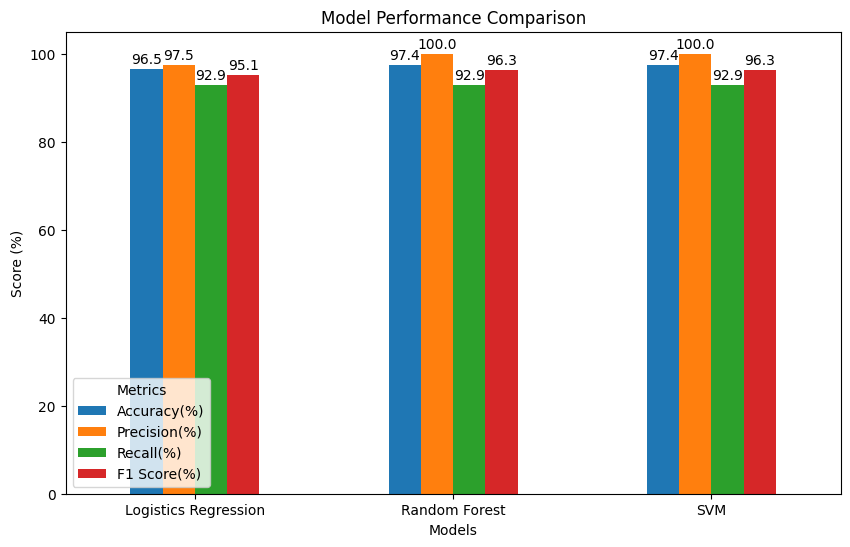

In [116]:
import matplotlib.pyplot as plt

# Set 'Model' as index so metrics become columns
results_df_plot = results_df.set_index("Model")

# Explicitly use matplotlib .subplots()
fig, ax = plt.subplots(figsize=(10,6))
results_df_plot.plot(kind="bar", ax=ax)

# Titles and labels
ax.set_title("Model Performance Comparison")
ax.set_ylabel("Score (%)")
ax.set_xlabel("Models")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(0, 105)
ax.legend(title="Metrics")

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=2)

plt.show()


Confusion Matrix

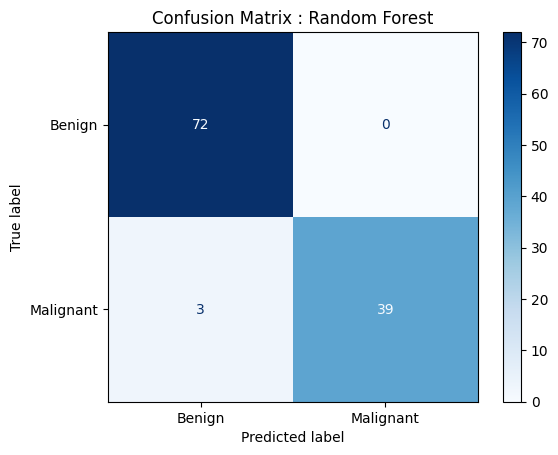

In [118]:
cm = confusion_matrix(y_test, y_predict_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix : Random Forest")
plt.show()

In [119]:
for n in [50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    print(f"n_estimators={n}, Accuracy={accuracy_score(y_test, y_pred)*100:.2f}%")


n_estimators=50, Accuracy=97.37%
n_estimators=100, Accuracy=97.37%
n_estimators=200, Accuracy=96.49%


Printing the classification report 

In [121]:
print("Random Forest Report:")
print(classification_report(y_test, y_predict_rf, target_names = ['Benign', 'Malignant']))

Random Forest Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

